In [17]:
from puzzlesolver import RotationPuzzle, RotationPuzzleAttempt, RotationPuzzleSolver
import statistics
import pandas as pd
import seaborn as sns

In [18]:
puzzle = RotationPuzzle(width=6, height=8, random_edgecount=5)
print(puzzle.__str__())

Puzzle :
|-5-|-4-|-2-|-2-|-4-|-5-|
5   5   2   4   1   5   3
|-4-|-4-|-3-|-1-|-1-|-3-|
1   5   4   4   1   3   4
|-4-|-1-|-1-|-3-|-5-|-5-|
3   3   4   2   5   4   5
|-2-|-5-|-5-|-4-|-1-|-5-|
3   5   1   3   3   5   3
|-4-|-3-|-3-|-3-|-4-|-2-|
3   3   1   2   5   5   2
|-1-|-3-|-1-|-2-|-4-|-4-|
3   4   3   1   4   2   1
|-1-|-1-|-5-|-1-|-3-|-3-|
1   5   5   5   2   2   5
|-1-|-1-|-4-|-5-|-1-|-1-|
3   4   2   3   4   1   3
|-4-|-1-|-2-|-4-|-3-|-1-|


In [19]:
puzzle = RotationPuzzle(width=4, height=3, random_edgecount=5)
attempt = RotationPuzzleAttempt(puzzle)
print(attempt.__str__())
print(attempt.checkValidity())
attempt.randomize()
print(attempt.__str__())
print(attempt.checkValidity())

RotationPuzzleAttempt :
|-2-||-4-||-2-||-5-|
4   55   22   22   4
|-1-||-5-||-5-||-3-|
|-1-||-5-||-5-||-3-|
1   33   55   44   5
|-2-||-2-||-3-||-1-|
|-2-||-2-||-3-||-1-|
4   44   11   55   5
|-1-||-2-||-1-||-4-|
True
RotationPuzzleAttempt :
|-5-||-4-||-2-||-5-|
2   15   25   22   4
|-4-||-5-||-2-||-3-|
|-3-||-5-||-4-||-1-|
1   25   25   35   4
|-1-||-3-||-5-||-3-|
|-4-||-1-||-3-||-5-|
1   22   21   54   1
|-4-||-4-||-1-||-5-|
False


In [20]:
puzzle = RotationPuzzle(width=4, height=4, random_edgecount=5, no_symmetry=True)
solver = RotationPuzzleSolver()
print(puzzle.__str__())
res = solver.analyze(puzzle)
print(f"Difficulty {res.difficultyIndex}")
print(f"{len(res.stepStats)} steps :")
print(res.stepStats)
print(f"{len(res.solutions)} solution(s) :")
for attempt in res.solutions:
    print(attempt.__str__())
    print(attempt.checkValidity())

Puzzle :
|-4-|-2-|-3-|-1-|
1   5   5   3   4
|-1-|-5-|-5-|-1-|
1   5   5   4   5
|-2-|-2-|-2-|-2-|
3   1   2   3   1
|-2-|-3-|-5-|-2-|
3   2   2   4   5
|-2-|-2-|-5-|-3-|
Difficulty 16
3 steps :
[[8, 5, 2, 1], [15, 0, 0, 1], [15, 1, 0, 0]]
2 solution(s) :
RotationPuzzleAttempt :
|-4-||-2-||-3-||-1-|
1   55   55   33   4
|-1-||-5-||-5-||-1-|
|-1-||-5-||-5-||-1-|
1   55   55   44   5
|-2-||-2-||-2-||-2-|
|-2-||-2-||-2-||-2-|
3   11   22   33   1
|-2-||-3-||-5-||-2-|
|-2-||-3-||-5-||-2-|
3   22   22   44   5
|-2-||-2-||-5-||-3-|
True
RotationPuzzleAttempt :
|-4-||-2-||-3-||-1-|
1   55   55   33   4
|-1-||-5-||-5-||-1-|
|-1-||-5-||-5-||-1-|
1   55   55   44   5
|-2-||-2-||-2-||-2-|
|-2-||-2-||-2-||-2-|
3   11   22   33   1
|-2-||-3-||-5-||-2-|
|-2-||-3-||-5-||-2-|
2   22   22   44   5
|-3-||-2-||-5-||-3-|
True


In [21]:
solver = RotationPuzzleSolver()
def randomPuzzleDiff(width: int, height: int, random_edgecount: int):
    return solver.analyze(RotationPuzzle(width=width, height=height, random_edgecount=random_edgecount, no_symmetry=True)).difficultyIndex

nb_iter = 100
sizes = [[n, n] for n in range(4, 9)]
edgecounts = range(4, 9)

difficultyStatsRows = []

for edgecount in edgecounts:
    for size in sizes:
        print(f"* Puzzle {size[0]}x{size[1]}, {edgecount} different edges")
        diffs = [randomPuzzleDiff(size[0], size[1], edgecount) for _ in range(nb_iter)]
        difficultyStatsRows.append([size[0], size[1], edgecount, min(diffs), statistics.median(diffs), max(diffs)])
        print(f"min : {min(diffs)}, med : {statistics.median(diffs)}, max : {max(diffs)}")

difficultyStats = pd.DataFrame(difficultyStatsRows, columns=["Width", "Height", "Edges", "Min", "Med", "Max"])

* Puzzle 4x4, 4 different edges
min : 6, med : 22.5, max : 53
* Puzzle 5x5, 4 different edges
min : 11, med : 33.0, max : 70
* Puzzle 6x6, 4 different edges
min : 18, med : 44.0, max : 85
* Puzzle 7x7, 4 different edges
min : 27, med : 55.5, max : 122
* Puzzle 8x8, 4 different edges
min : 47, med : 73.0, max : 130
* Puzzle 4x4, 5 different edges
min : 4, med : 13.0, max : 28
* Puzzle 5x5, 5 different edges
min : 7, med : 19.0, max : 46
* Puzzle 6x6, 5 different edges
min : 7, med : 25.0, max : 53
* Puzzle 7x7, 5 different edges
min : 16, med : 30.5, max : 56
* Puzzle 8x8, 5 different edges
min : 17, med : 36.0, max : 69
* Puzzle 4x4, 6 different edges
min : 1, med : 8.0, max : 19
* Puzzle 5x5, 6 different edges
min : 2, med : 12.0, max : 35
* Puzzle 6x6, 6 different edges
min : 6, med : 16.5, max : 35
* Puzzle 7x7, 6 different edges
min : 8, med : 19.0, max : 45
* Puzzle 8x8, 6 different edges
min : 10, med : 24.0, max : 52
* Puzzle 4x4, 7 different edges
min : 0, med : 6.0, max : 18
*

<Axes: xlabel='Edges', ylabel='Width'>

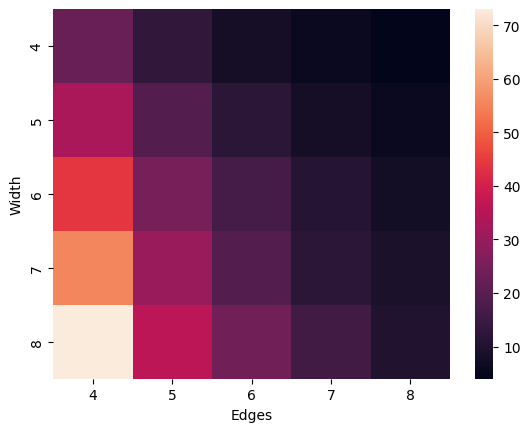

In [24]:
snspivot = difficultyStats.pivot(index="Width", columns="Edges", values="Med")
sns.heatmap(snspivot)